In [2]:
from scipy import stats
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import invisible_cities.core.fit_functions as fit

### Binning around pdf

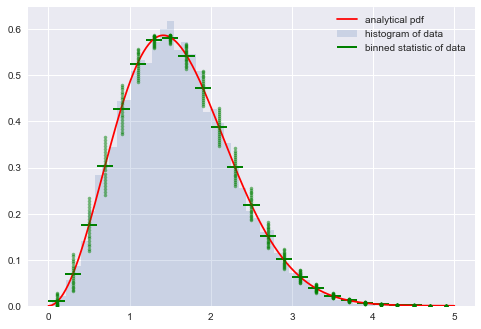

In [7]:
# As a final example, we will use ``bin_edges`` and ``binnumber`` to make a
# plot of a distribution that shows the mean and distribution around that
# mean per bin, on top of a regular histogram and the probability
# distribution function:


x = np.linspace(0, 5, num=500)
x_pdf = stats.maxwell.pdf(x)
samples = stats.maxwell.rvs(size=10000)

bin_means, bin_edges, binnumber = stats.binned_statistic(x, x_pdf,
        statistic='mean', bins=25)
bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2

plt.figure()
plt.hist(samples, bins=50, normed=True, histtype='stepfilled',
         alpha=0.2, label='histogram of data')
plt.plot(x, x_pdf, 'r-', label='analytical pdf')
plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='g', lw=2,
           label='binned statistic of data')
plt.plot((binnumber - 0.5) * bin_width, x_pdf, 'g.', alpha=0.5)
plt.legend(fontsize=10)
plt.show()

In [16]:
n=1e+5
nbins = 50
#x = np.linspace(-2, 2, num=40)
x = np.random.uniform(-2, 2, int(n))
y = np.random.normal(x**2, np.abs(x) + 1)

In [17]:
def compute_profile_histogram(x, y, xr, nbins=50):


    assert(len(x) == len(y))
    n = len(x)
    means_result = stats.binned_statistic(x, [y, y**2], bins=nbins,
                   range=xr, statistic='mean')
    means, means2 = means_result.statistic
    standard_deviations = np.sqrt(means2 - means**2)/np.sqrt(n/nbins)
    bin_edges = means_result.bin_edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    bin_hwidths = (bin_edges[1:] - bin_edges[:-1]) / 2.
    return bin_centers, bin_hwidths, means, standard_deviations

def plot_profile_histogram(x, y, xr, nbins=50):
    xp, xep, yp, yep = compute_profile_histogram(x, y, xr, nbins)
    plt.errorbar(x=xp, xerr=xep, y=yp, yerr=yep,
                 linestyle='none', marker='.')
    plt.show()
    return xp, xep, yp, yep


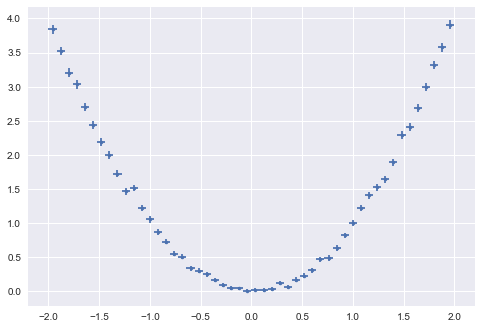

In [18]:
xp, xep, yp, yep = plot_profile_histogram(x, y, xr=(-2,2), nbins=50)

In [21]:
x_p, y_p, y_err = fit.profileX(x, y, nbins=50, xrange=(-2,2))

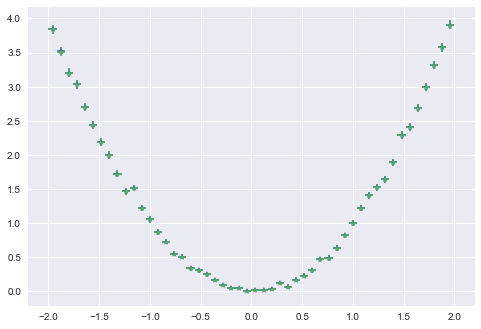

In [27]:
plt.errorbar(x=xp, xerr=xep, y=yp, yerr=yep,
                 linestyle='none', marker='*')
plt.errorbar(x=x_p, xerr=xep, y=y_p, yerr=y_err,
                 linestyle='none', marker='.')
plt.show()

In [ ]:
rofileX(xdata, ydata, nbins=100,
             xrange=None, yrange=None, drop_nan=True)

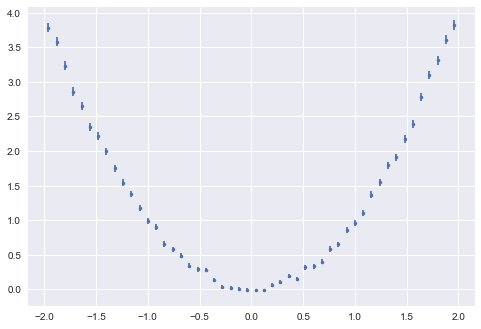

In [72]:


means_result = stats.binned_statistic(x, [y, y**2], bins=nbins, range=(-2,2), statistic='mean')
means, means2 = means_result.statistic
standard_deviations = np.sqrt(means2 - means**2)/np.sqrt(n/nbins)
bin_edges = means_result.bin_edges
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.

plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.')
plt.show()

In [82]:
def profile_histogram(x, y, nbins=50):
    means_result = stats.binned_statistic(x, [y, y**2], bins=nbins, range=(-2,2), statistic='mean')
    means, means2 = means_result.statistic
    standard_deviations = np.sqrt(means2 - means**2)/np.sqrt(n/nbins)
    bin_edges = means_result.bin_edges
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    bin_hwidths = (bin_edges[1] - bin_edges[0]) / 2.
    return bin_centers, bin_hwidths, means, standard_deviations

In [83]:
xp, xep, yp, yep = profile_histogram(x, y, nbins=50)

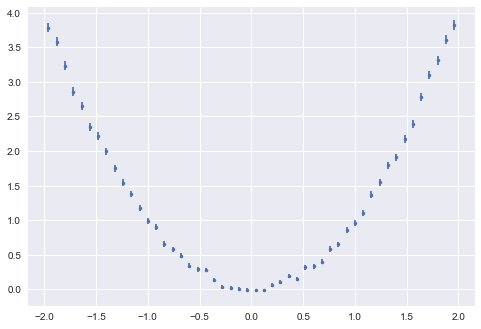

In [84]:
plt.errorbar(x=bin_centers, y=means, yerr=standard_deviations, linestyle='none', marker='.')
plt.show()

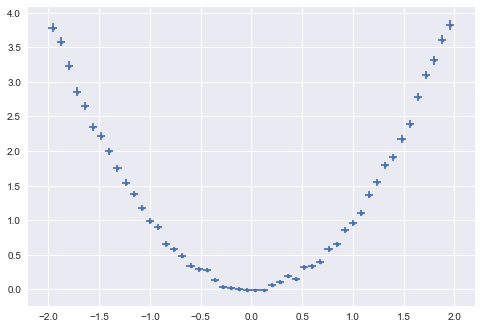

In [85]:
plt.errorbar(x=xp, xerr=xep, y=yp, yerr=yep, linestyle='none', marker='.')
plt.show()

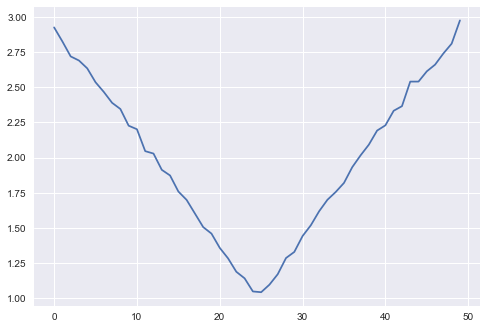

In [36]:
plt.plot(standard_deviations)
plt.show()

In [80]:
def profile_histogram(x, y, nbins=50):
    df = pd.DataFrame({'x': x, 'y': y})

    # calculate in which bin row belongs base on `x`
    # bins needs the bin edges, so this will give as 100 equally sized bins
    bins = np.linspace(x[0], x[-1], nbins+1)
    df['bin'] = np.digitize(x, bins=bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_width = bins[1] - bins[0]

    # grouby bin, so we can calculate stuff
    binned = df.groupby('bin')
    # calculate mean and standard error of the mean for y in each bin
    profile = binned['y'].agg(['mean', 'sem'])
    profile['x'] = bin_centers
    profile['xerr'] = bin_width / 2
    
    return profile


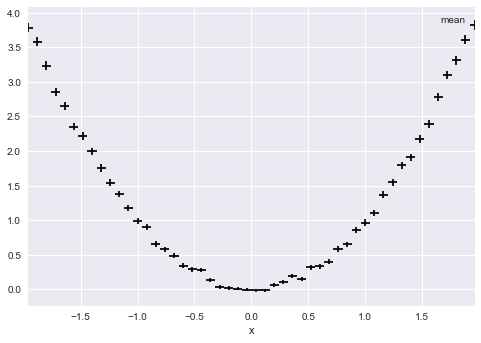

In [73]:
df = pd.DataFrame({'x': x, 'y': y})

# calculate in which bin row belongs base on `x`
# bins needs the bin edges, so this will give as 100 equally sized bins
bins = np.linspace(-2, 2, nbins+1)
df['bin'] = np.digitize(x, bins=bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

# grouby bin, so we can calculate stuff
binned = df.groupby('bin')
# calculate mean and standard error of the mean for y in each bin
result = binned['y'].agg(['mean', 'sem'])
result['x'] = bin_centers
result['xerr'] = bin_width / 2

# plot it

result.plot(
    x='x',
    y='mean',
    xerr='xerr',
    yerr='sem',
    linestyle='none',
    capsize=0,
    color='black',
)
plt.show()

In [77]:
result

,mean,sem,x,xerr
bin,,,,
1,3.783450,0.066272,-1.96,0.04
2,3.577766,0.065227,-1.88,0.04
3,3.235113,0.061963,-1.80,0.04
4,2.860933,0.057638,-1.72,0.04
5,2.655001,0.060509,-1.64,0.04
6,2.354244,0.056694,-1.56,0.04
7,2.215981,0.056946,-1.48,0.04
8,1.997542,0.052663,-1.40,0.04
9,1.753170,0.052990,-1.32,0.04


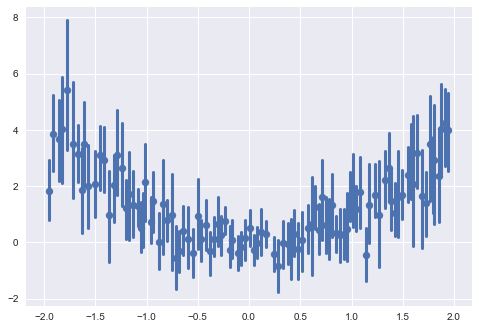

In [29]:
sns.regplot(x=x, y=y, x_bins=100, fit_reg=None)
plt.show()

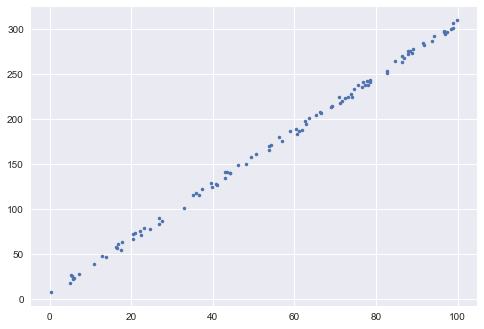

In [147]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 2 + np.random.uniform(0., 10., 100)
plt.plot(x, y, '.')
plt.show()

In [148]:
x

array([ 82.72871268,  66.57129548,  65.39938891,  75.54649401,
        98.90029967,  58.92590242,  48.0789179 ,  63.68885953,
        40.80979251,  20.41425247,  91.78334607,  60.44357032,
        53.72074341,  68.95334655,  13.883869  ,  16.27157615,
         5.29132772,  20.50797771,  26.85819502,  71.63531895,
        71.07958799,  86.97916698,  91.4089715 ,  69.26186919,
        97.40660681,   0.43982423,  37.28089991,  56.1482547 ,
        72.49114726,  39.5172956 ,  39.85989281,  86.48775637,
         5.00810588,  77.23689309,  94.16123071,  89.15468453,
        36.51300506,  61.12255401,  82.8211675 ,  76.45665703,
        43.0069808 ,  50.52083886,   5.72096325,  73.06084355,
        86.43103238,  62.87795698,  73.93627883,  24.52912445,
         5.52717326,  22.31537207,  40.97931634,  87.8323142 ,
        78.42671971,  16.79743246,  44.22325353,  98.82427327,
        96.81130218,  22.22908195,  96.63509921,  27.67542573,
        42.94876428,  20.85405711,  56.98442892,   5.95

In [149]:
y

array([ 251.3883771 ,  207.01072211,  204.19429529,  238.0030013 ,
        306.54158655,  186.88230069,  149.90508614,  201.41905448,
        128.04023179,   72.3369551 ,  282.41126013,  189.27628303,
        169.5998462 ,  213.4769271 ,   46.42745415,   58.21097703,
         26.60024255,   66.48248879,   83.9075729 ,  219.6690198 ,
        217.30377885,  267.27395368,  284.09359285,  214.13881764,
        296.36420665,    7.88672631,  121.8734759 ,  180.35381622,
        223.84548559,  128.67763095,  124.22892919,  263.5057972 ,
         18.07640568,  237.39874264,  291.69775686,  277.66539545,
        116.12852496,  186.24497745,  252.89823492,  235.56859687,
        140.86644691,  161.38137982,   22.85374346,  224.46910486,
        269.4787605 ,  193.99975785,  227.85678221,   78.18524634,
         25.9225866 ,   71.48095663,  127.19978456,  275.13912662,
        243.62760395,   61.2161498 ,  140.31045595,  301.61151511,
        294.46777256,   75.61825448,  297.33757869,   86.89650

In [150]:
e = np.repeat(10., 100)

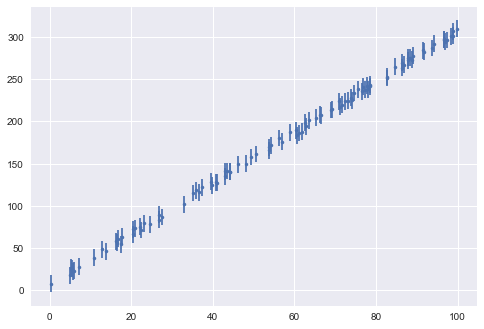

In [151]:
plt.errorbar(x, y, yerr=e, linestyle='none', marker='.')
plt.show()

In [143]:
def line(x, a, b):
    return a * x + b

In [166]:
def line2(x):
    return 3 * x + 7.5

In [155]:
popt, pcov = curve_fit(line, x, y, sigma=e)

In [156]:
print("a = {} +- {}".format(popt[0], pcov[0,0]**0.5))
print("b = {} +- {}".format(popt[1], pcov[1,1]**0.5))

a = 2.998836462843998 +- 0.009659011758818168
b = 7.409090820532199 +- 0.6043046725154615


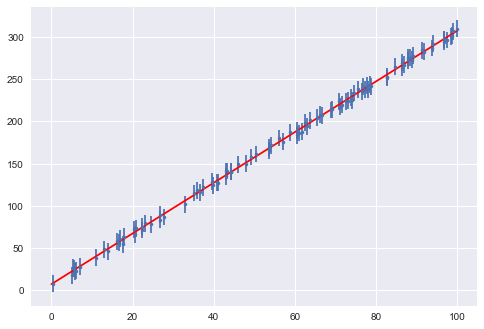

In [154]:
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.errorbar(x, y, yerr=e, linestyle='none', marker='.')
plt.plot(xfine, line(xfine, popt[0], popt[1]), 'r-')
plt.show()

In [163]:
fitf = lambda x: line(x, *vals)

In [164]:
fitf(3,2)

TypeError: <lambda>() takes 1 positional argument but 2 were given

In [169]:
fn, par, err, chi2 = fit.fit(line, x, y, sigma=e)

TypeError: line() missing 2 required positional arguments: 'a' and 'b'